In [2]:
import numpy as np
import os
import mlflow
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img,img_to_array
import warnings
warnings.filterwarnings('ignore')

### loading the data

In [3]:
datagen = ImageDataGenerator(rescale=(1.0/255.),validation_split = 0.25)

In [4]:
path = '/kaggle/input/dog-breed-image-dataset/dataset'
train_gen = datagen.flow_from_directory(
            path,
            target_size = (224,224),
            batch_size= 32,
            class_mode = 'sparse',
            subset='training')

Found 727 images belonging to 10 classes.


In [5]:
val_gen = datagen.flow_from_directory(
            path,
            target_size = (224,224),
            batch_size= 32,
            class_mode = 'sparse',
            subset='validation')

Found 240 images belonging to 10 classes.


In [6]:
val_gen.class_indices

{'Beagle': 0,
 'Boxer': 1,
 'Bulldog': 2,
 'Dachshund': 3,
 'German_Shepherd': 4,
 'Golden_Retriever': 5,
 'Labrador_Retriever': 6,
 'Poodle': 7,
 'Rottweiler': 8,
 'Yorkshire_Terrier': 9}

## visualizations
### Beagle

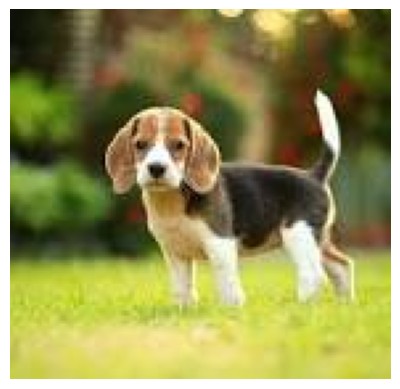

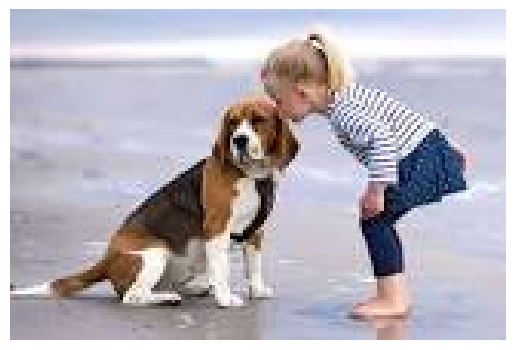

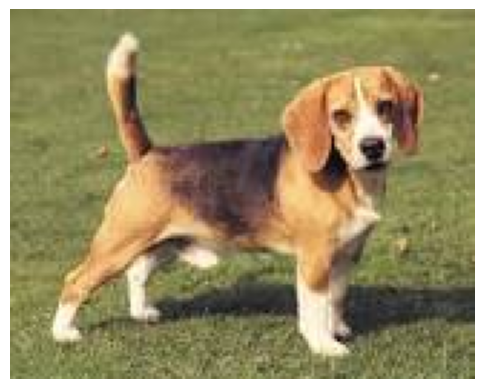

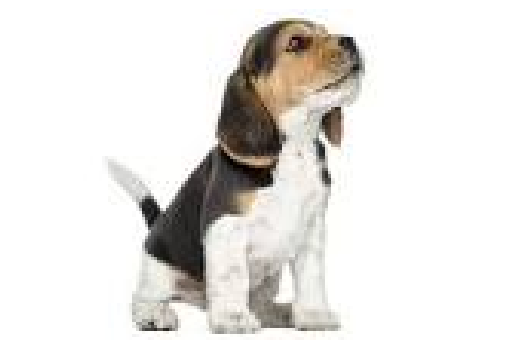

In [7]:
def get_image_paths(folder_path):
    image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff')
    image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.lower().endswith(image_extensions)]
    return image_paths

folder_path = '/kaggle/input/dog-breed-image-dataset/dataset/Beagle'
beag_paths_ = get_image_paths(folder_path)

for path_ in beag_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure() 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Boxer

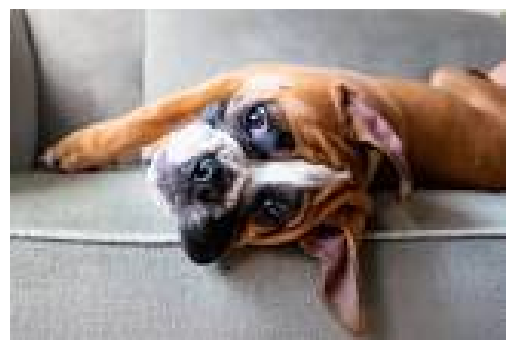

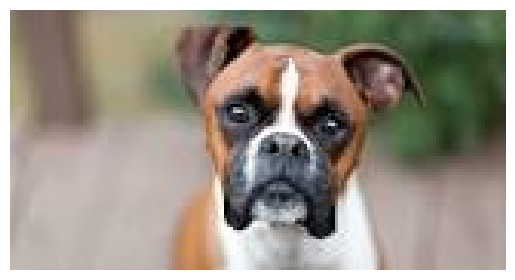

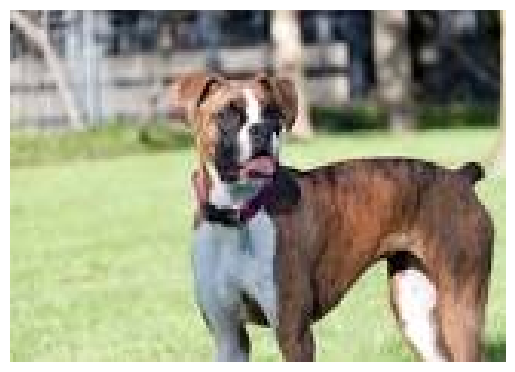

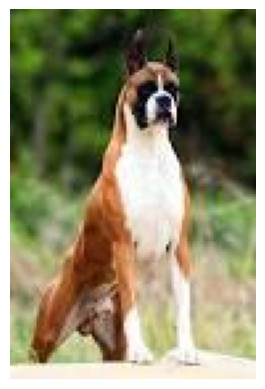

In [8]:
bx_folder_path = '/kaggle/input/dog-breed-image-dataset/dataset/Boxer'
bx_paths_ = get_image_paths(bx_folder_path)

for path_ in bx_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure() 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Bulldog

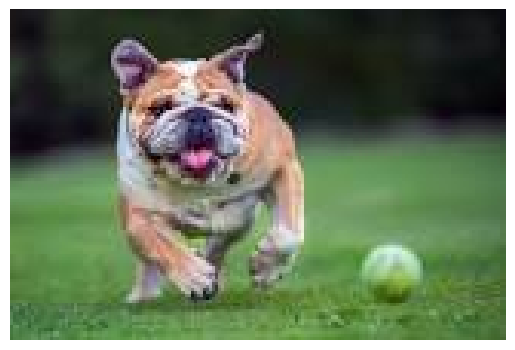

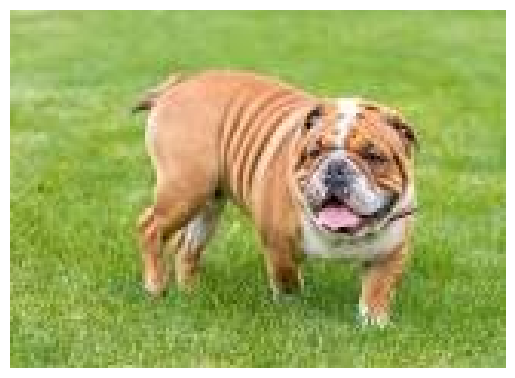

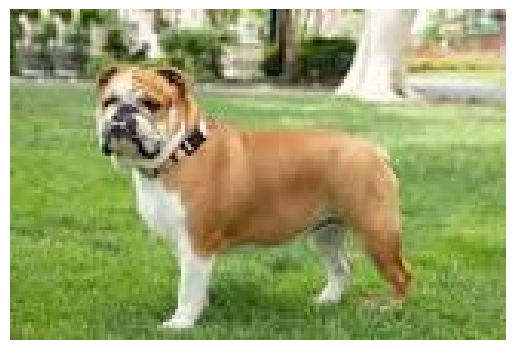

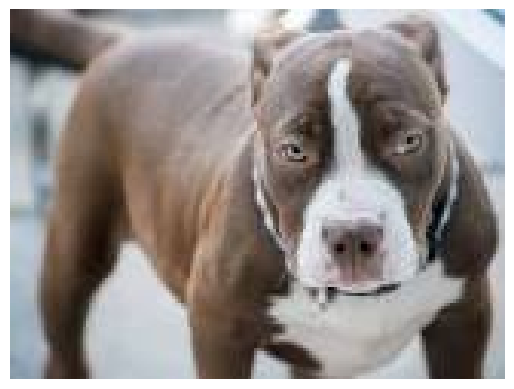

In [9]:
bl_folder_path = '/kaggle/input/dog-breed-image-dataset/dataset/Bulldog'
bl_paths_ = get_image_paths(bl_folder_path)

for path_ in bl_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure() 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Dachshund

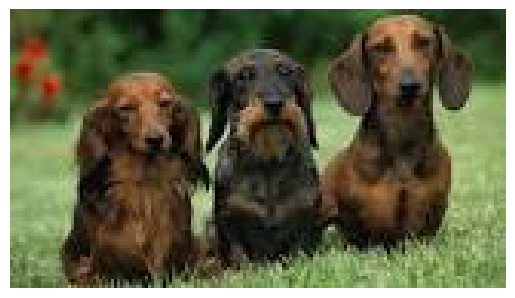

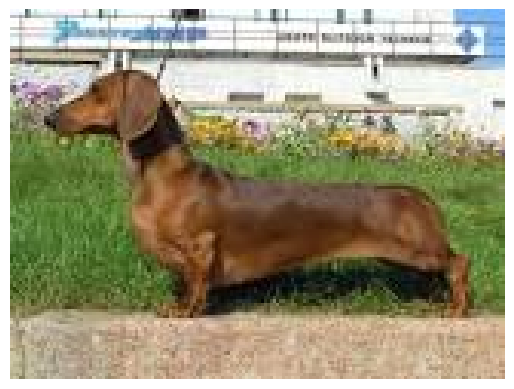

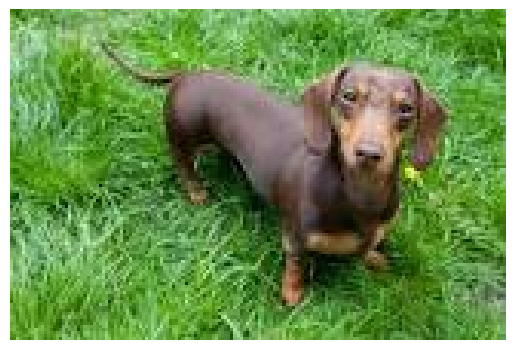

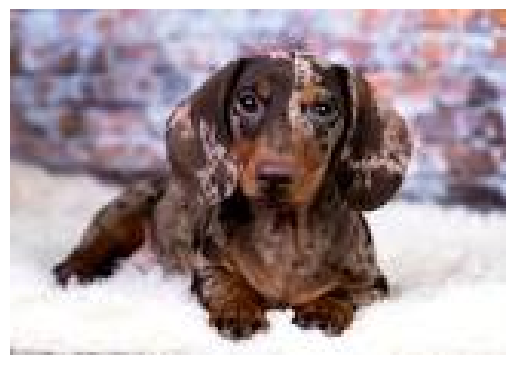

In [10]:
dc_folder_path = '/kaggle/input/dog-breed-image-dataset/dataset/Dachshund'
dc_paths_ = get_image_paths(dc_folder_path)

for path_ in dc_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure() 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### German shepherd

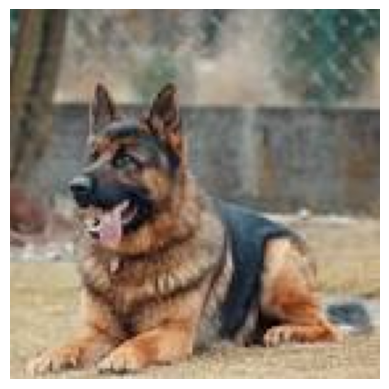

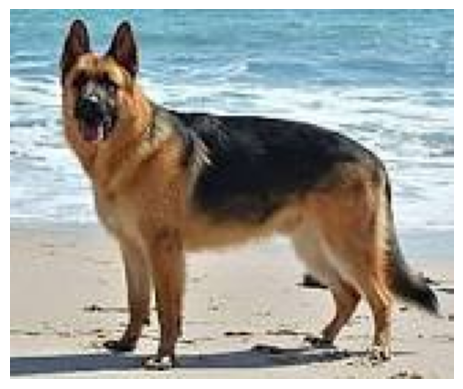

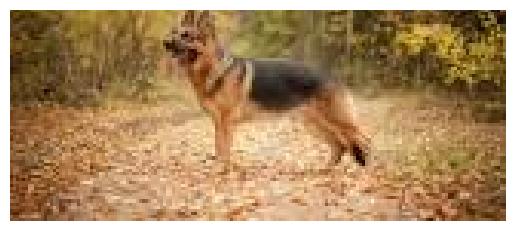

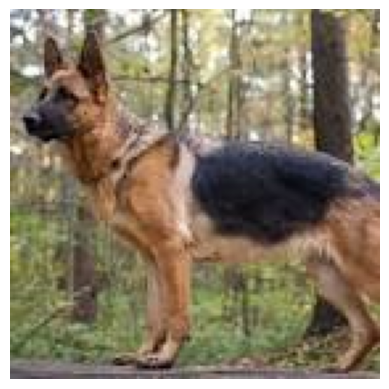

In [11]:
gmfolder_path = '/kaggle/input/dog-breed-image-dataset/dataset/German_Shepherd'
gm_paths_ = get_image_paths(gmfolder_path)

for path_ in gm_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure() 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Golden retriever

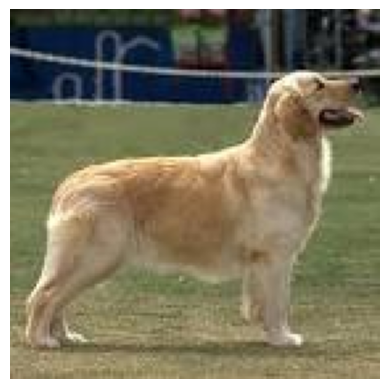

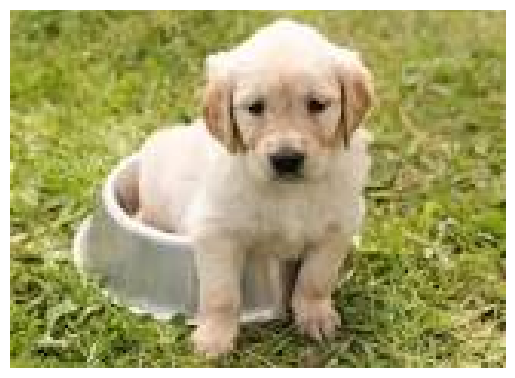

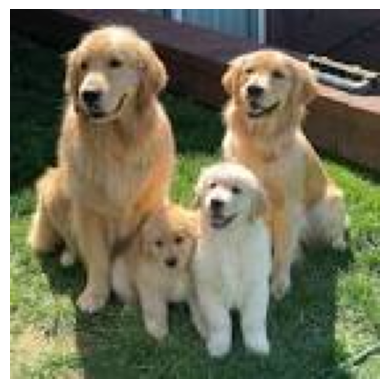

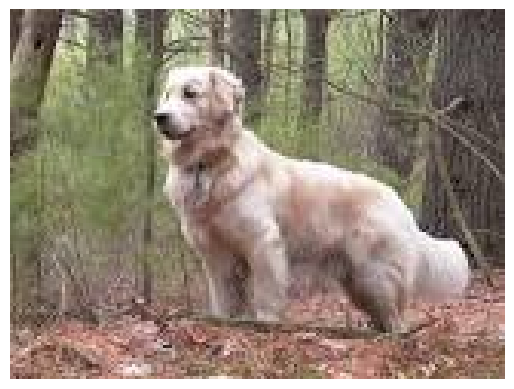

In [12]:
grfolder_path = '/kaggle/input/dog-breed-image-dataset/dataset/Golden_Retriever'
gr_paths_ = get_image_paths(grfolder_path)

for path_ in gr_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure() 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Labrador Retriever

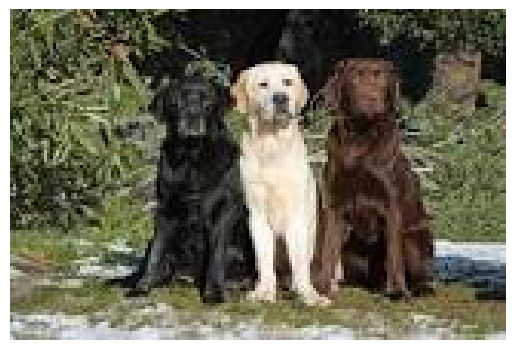

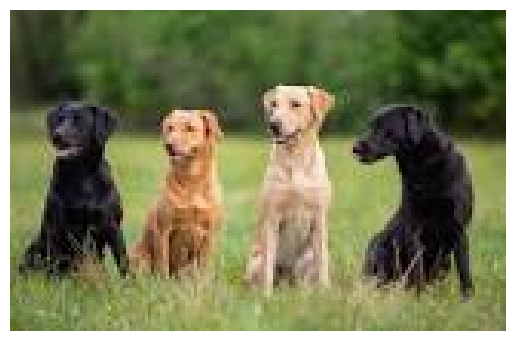

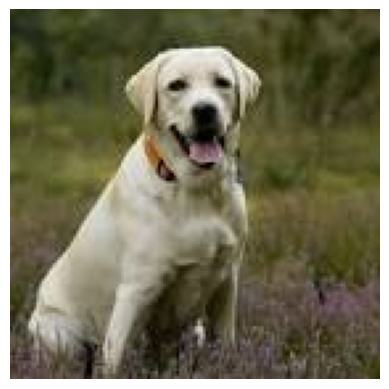

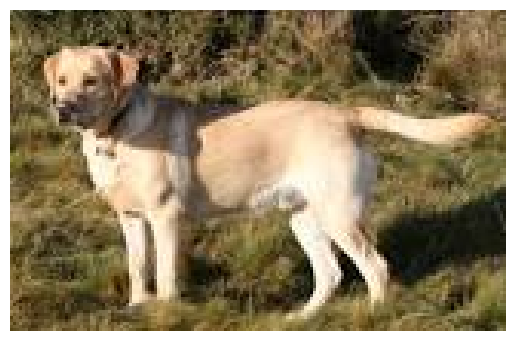

In [13]:
lbfolder_path = '/kaggle/input/dog-breed-image-dataset/dataset/Labrador_Retriever'
lb_paths_ = get_image_paths(lbfolder_path)

for path_ in lb_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure() 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Poodle

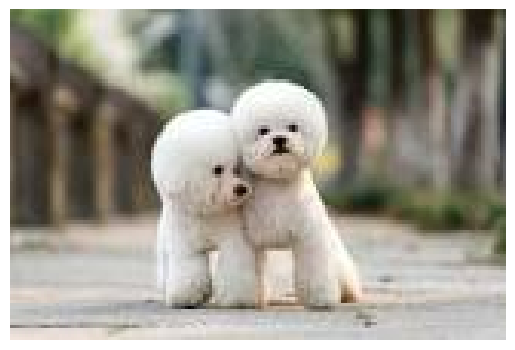

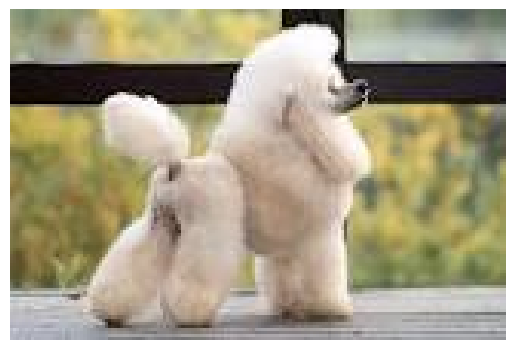

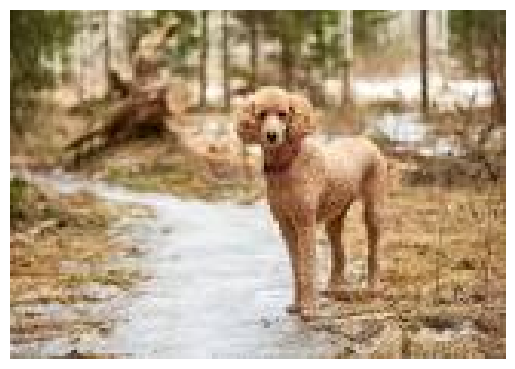

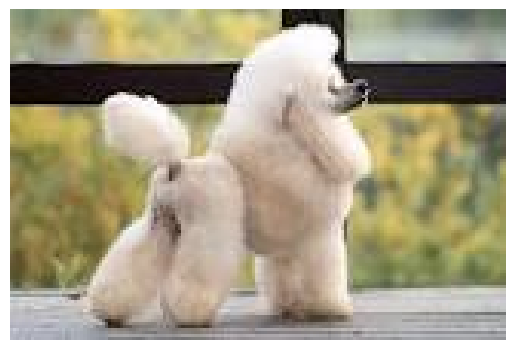

In [14]:
pdfolder_path = '/kaggle/input/dog-breed-image-dataset/dataset/Poodle'
pd_paths_ = get_image_paths(pdfolder_path)

for path_ in pd_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure() 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Rotweiler

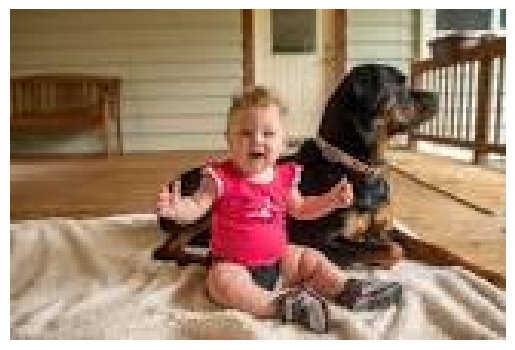

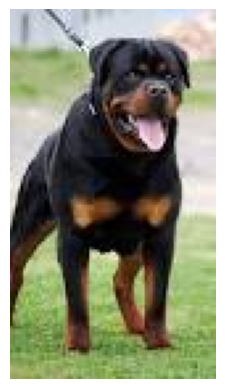

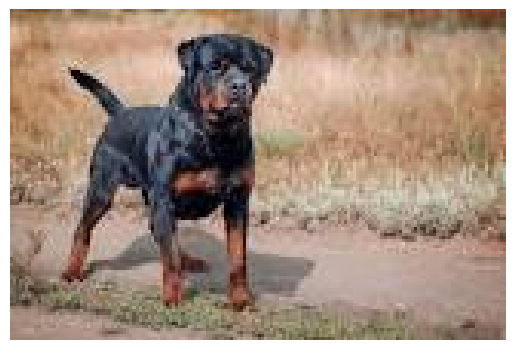

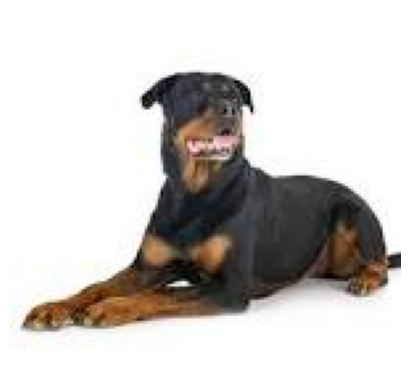

In [15]:
rtfolder_path = '/kaggle/input/dog-breed-image-dataset/dataset/Rottweiler'
rt_paths_ = get_image_paths(rtfolder_path)

for path_ in rt_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure() 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### Yorkshire Terrier

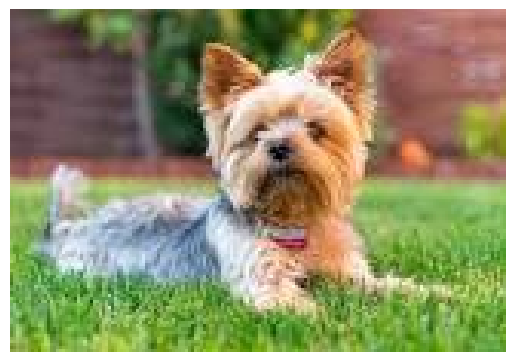

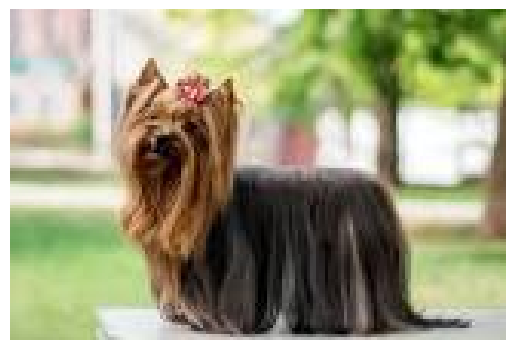

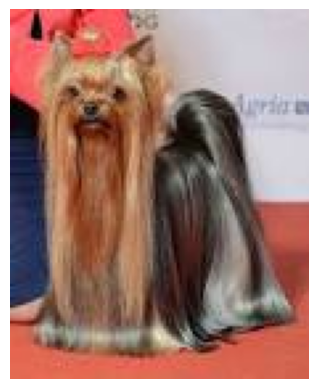

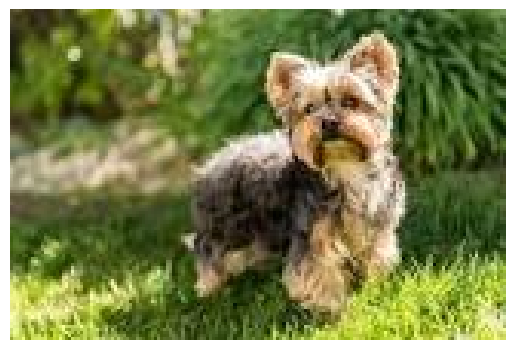

In [16]:
ytfolder_path = '/kaggle/input/dog-breed-image-dataset/dataset/Yorkshire_Terrier'
yt_paths_ = get_image_paths(ytfolder_path)

for path_ in yt_paths_[:4]:
    img = tf.keras.utils.load_img(path=path_)
    plt.figure() 
    plt.imshow(img)
    plt.axis('off')
    plt.show()

### defining parameters

In [17]:
learning_rate=0.001
num_epochs = 10
batch_size = 32
input_shape = (224,224,3)

In [18]:
experiment_name = 'dog_breed_classification'
run_name = 'breed_class'

### building the model

In [19]:
model = Sequential([
    Conv2D(256,(3,3),activation='relu',input_shape=input_shape),
    MaxPooling2D(2,2),
    
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(256,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.2),
    Dense(10,activation='softmax')
])

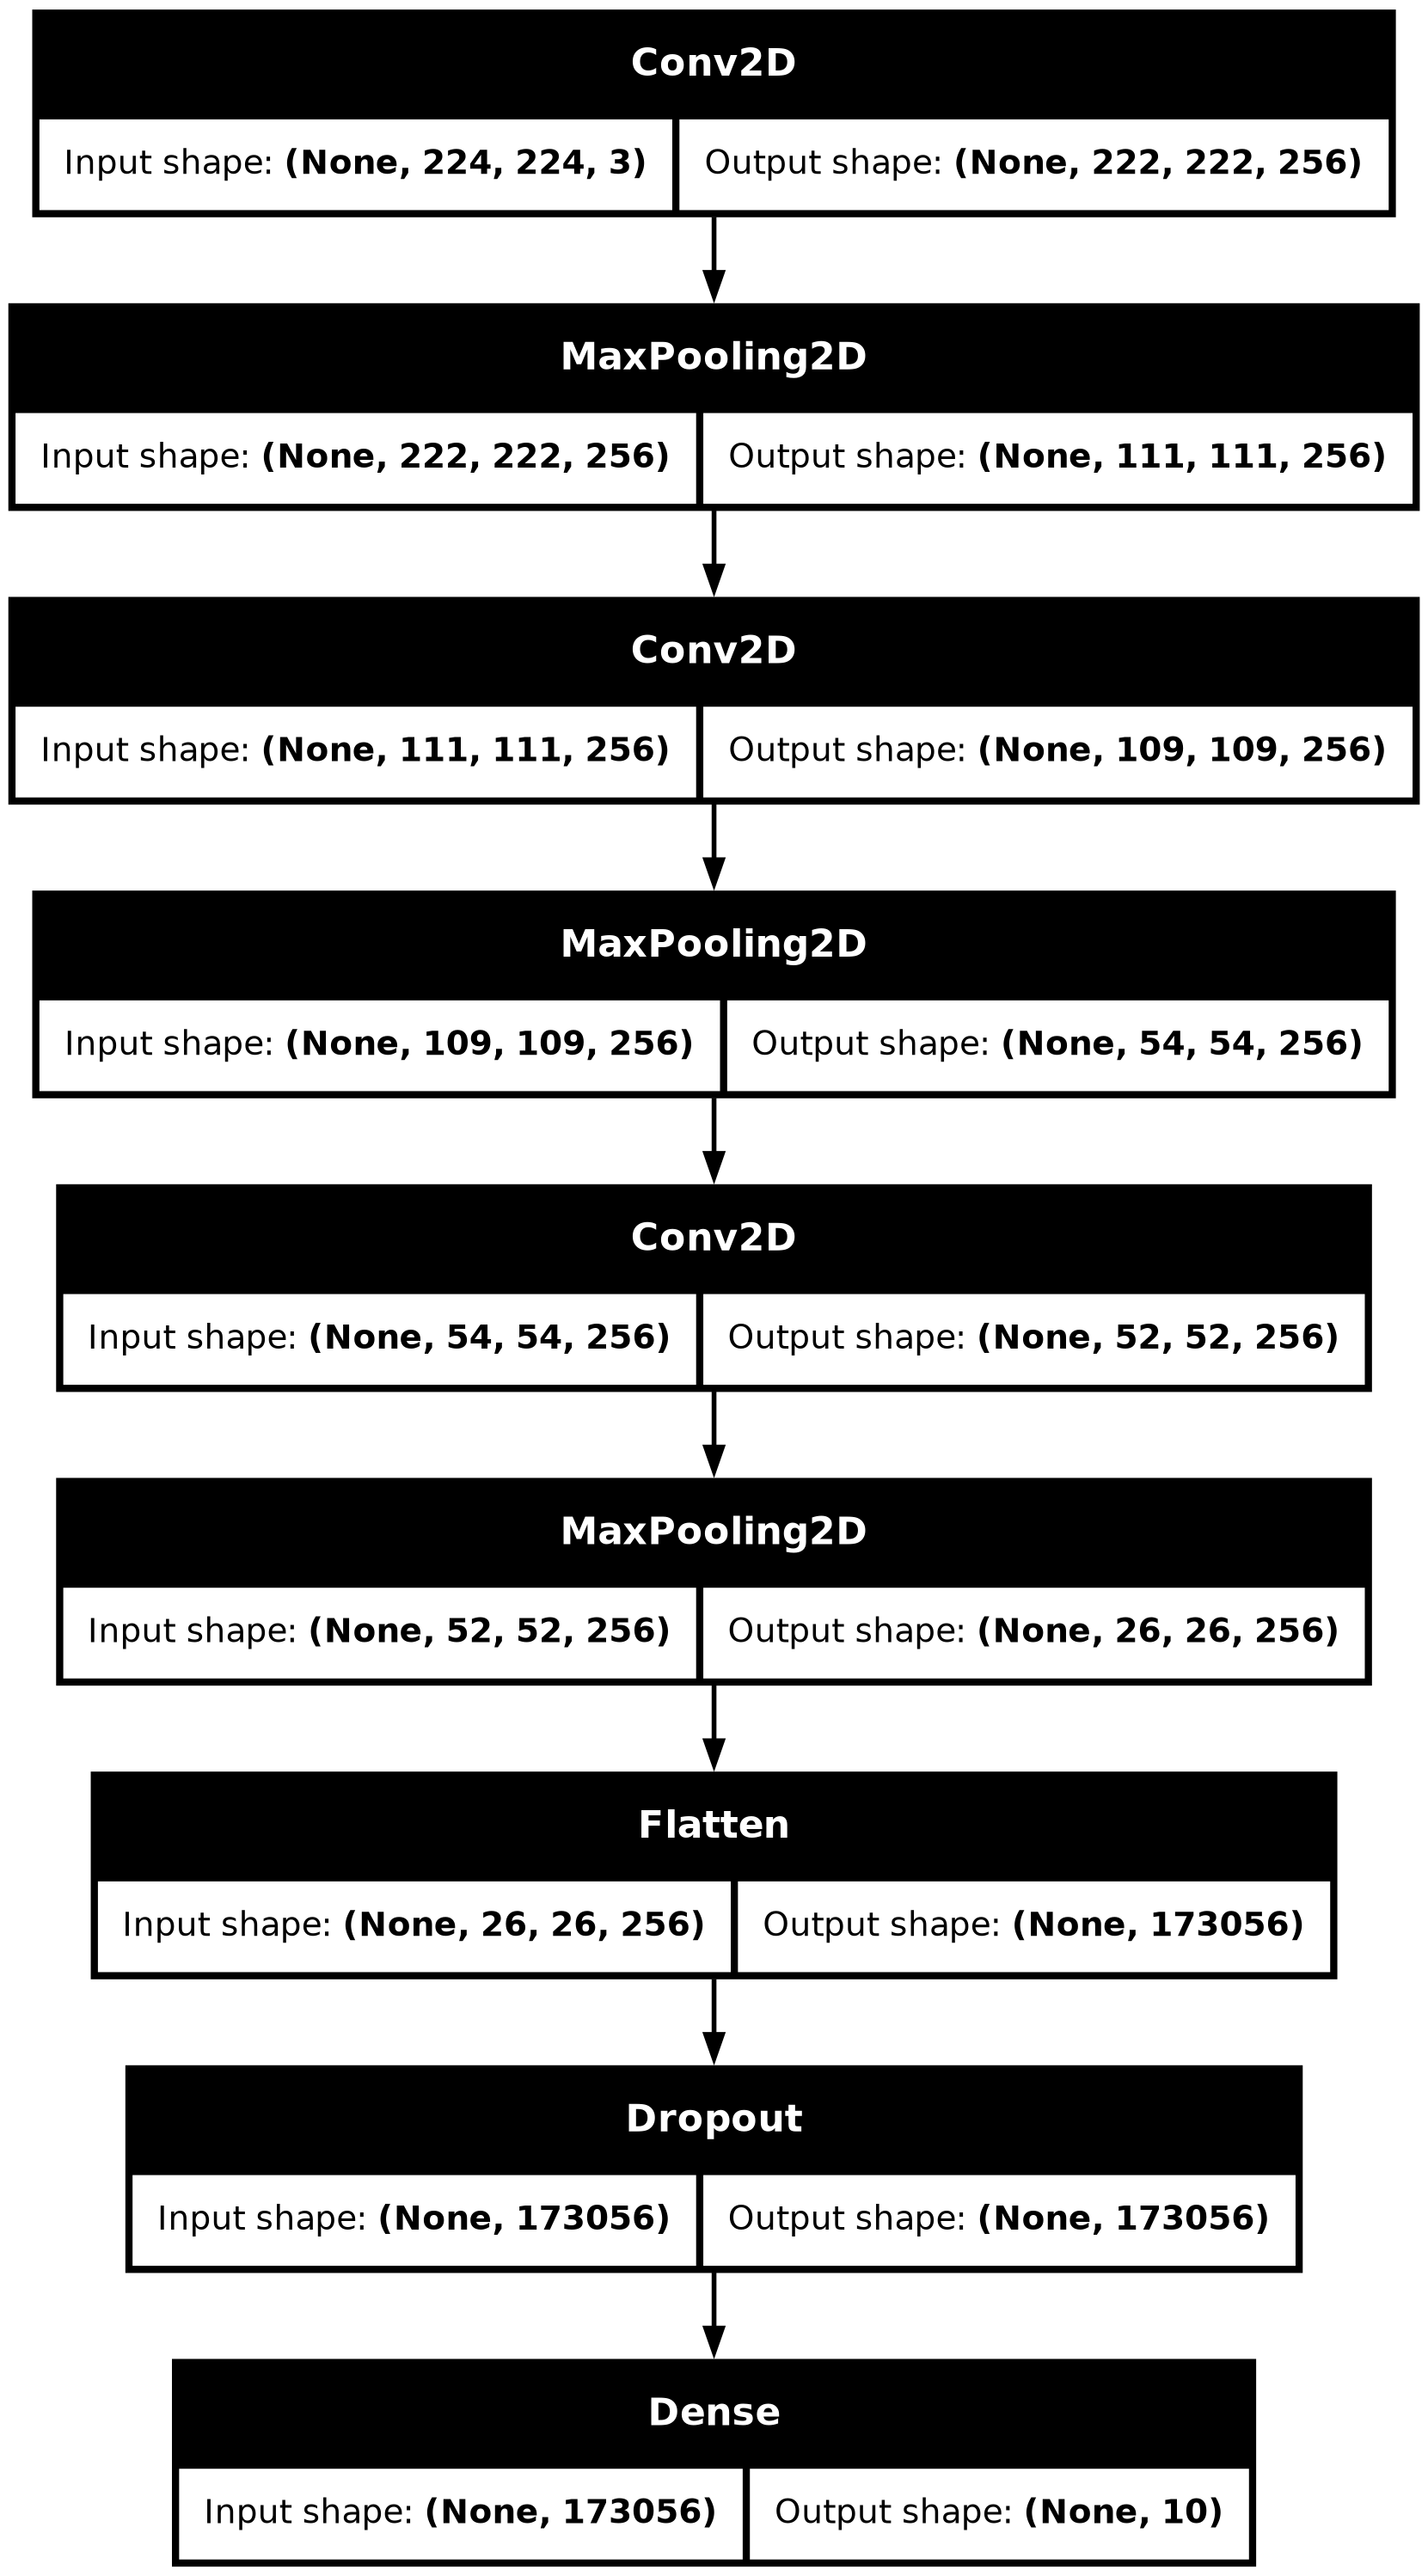

In [21]:
model_plot = tf.keras.utils.plot_model(model,show_shapes=True)
model_plot

In [23]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),metrics=['accuracy'])

### creating a directory for the runs

In [24]:
logdir = os.path.join('logs',experiment_name,run_name)
tb_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir,write_graph=True)

### fitting the model

In [25]:
hist = model.fit(train_gen,epochs = num_epochs,
                 validation_data = val_gen,callbacks = [tb_callback])

Epoch 1/10
 1/23 ━━━━━━━━━━━━━━━━━━━━ 12:16 33s/step - accuracy: 0.0625 - loss: 2.3038

I0000 00:00:1721751244.228804     986 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


23/23 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.0980 - loss: 3.1663 - val_accuracy: 0.1875 - val_loss: 2.2812
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.2685 - loss: 2.1835 - val_accuracy: 0.5708 - val_loss: 1.2912
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - accuracy: 0.7158 - loss: 0.9695 - val_accuracy: 0.9417 - val_loss: 0.2468
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 167ms/step - accuracy: 0.9719 - loss: 0.1568 - val_accuracy: 1.0000 - val_loss: 0.0064
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 0.9982 - loss: 0.0181 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 164ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 5.0130e-04
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 1.0000 - loss: 3.3062e-04 - val_accuracy: 1.0000 - val_loss: 1.4905e-04
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 1.0000 - loss: 1.2110e-04 - val_accuracy:

### experiment tracking

In [29]:
mlflow.set_experiment(experiment_name = experiment_name)
with mlflow.start_run(run_name = run_name) as mlflow_run:
    mlflow.set_tag('optimizer','tf.keras.optimizer.Adam')
    mlflow.set_tag('loss','sparse_categorical_crossentropy')
    
    mlflow.keras.log_model(model,'model')
    
    mlflow.log_param('learning rate',learning_rate)
    mlflow.log_param('input shape',input_shape)
    mlflow.log_param('batch size',batch_size)
    mlflow.log_param('epochs',num_epochs)
    
    #logging metrics
    mlflow.log_metric('train_acc',hist.history['accuracy'][-1])
    mlflow.log_metric('train_loss',hist.history['loss'][-1])
    mlflow.log_metric('val_acc',hist.history['val_accuracy'][-1])
    mlflow.log_metric('val_loss',hist.history['val_loss'][-1])
    
    mlflow_run_id = mlflow_run.info.run_id

2024/07/23 16:27:48 WARNING mlflow.keras.save: You are saving a Keras model without specifying model signature.


### model registry to MLflow UI

In [30]:
model_name = 'breed_classifier'
model_version = 'version 1'

In [32]:
with mlflow.start_run(run_id=mlflow_run_id):
    result = mlflow.register_model(
        model_uri=f"runs:/{mlflow_run_id}/model",
        name=model_name
    )

Successfully registered model 'breed_classifier'.
Created version '1' of model 'breed_classifier'.


### saving model to local machine

In [33]:
model.save('breed_cls.keras')